In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/ihesp/shared/xiliang/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.nday1.PREC_F.033801_051212.nc')

FileNotFoundError: [Errno 2] No such file or directory: b'/ihesp/shared/xiliang/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.nday1.PREC_F.033801_051212.nc'

In [3]:
plotvar3 = data.variables['PREC_F']#[9:5760:12,200:600,550:1500]

In [4]:
np.nanmin(plotvar3)

-1.0

In [5]:
pl = plotvar3[:,224:343,600:1400]

In [6]:
pl[pl == -1.0] = np.nan

In [7]:
pl.shape

(2098, 119, 800)

In [8]:
plot1 = np.nanmean(pl, axis = 1)
aveplotnew = np.nanmean(plot1,axis=1)

In [42]:
new = aveplotnew[:1956]

In [9]:
b2= np.load(file="PRE330-s.npy")

In [10]:
b2.shape

(2160,)

In [11]:
result1 = np.zeros((84))
i = 0

In [12]:
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(331,338)]
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/scratch/user/xiliangdiao/figures/PREC_F_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.nc')
        plotvar = data.variables['PREC_F'][0,:,:]
        plotvar[plotvar == -1.0] = np.nan
        #lont = data.variables['TLONG']
        #latt = data.variables['TLAT']
        #lont = lont[200:600,550:1500]
        #latt = latt[200:600,550:1500]
        plot1 = plotvar[224:343,600:1400]
        plot1 = np.nanmean(plot1, axis = 0)
        aveplot = np.nanmean(plot1,axis=0)
    
        result1[i] = aveplot
        i = i + 1

In [43]:
lala = np.hstack((b2,result1))

In [44]:
lala.shape

(2244,)

In [45]:
lal = np.hstack((lala,new))

In [47]:
lal.shape

(4200,)

In [48]:
d4 = lal.reshape(350,12)

In [52]:
dmean = np.nanmean(d4,axis=1)

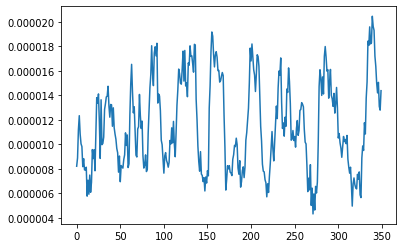

In [53]:
plt.plot(dmean)

In [3]:
dmean = np.loadtxt("ddd.out")

In [4]:
mean = np.nanmean(dmean)

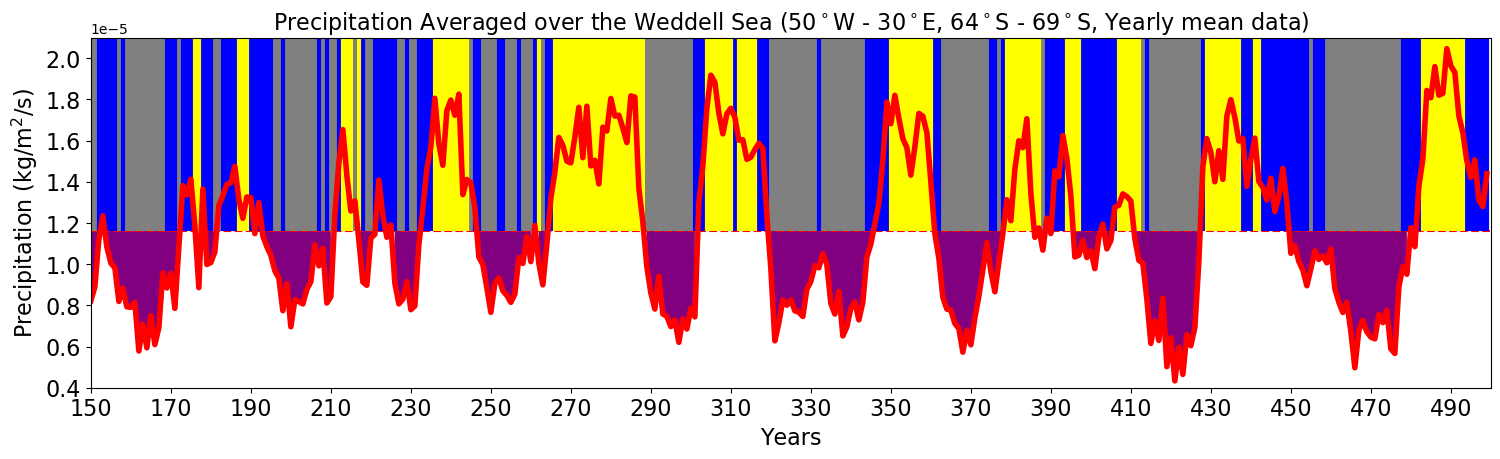

In [6]:
t = np.arange(0,350,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(dmean,'red',linewidth=4)

ax0.fill_between(t,mean,dmean,where=dmean < mean,facecolor='purple', alpha=1)
plt.hlines(mean, 0, 350, colors = "red",linestyles = "dashed")
plt.vlines(noxx, mean, 0.000021, colors = "grey",linewidth=3)
plt.vlines(mrpxx, mean, 0.000021, colors = "blue",linewidth=3)
plt.vlines(wspxx, mean, 0.000021, colors = "yellow",linewidth=3)
#plt.axhspan(std,0.000005,facecolor='yellow', alpha=1)
#plt.axhspan(-std,std,facecolor='lightblue', alpha=1)
#plt.axhspan(-0.000003,-std,facecolor='lightgreen', alpha=1)
#plt.xticks(range(0,3720,240), ['150','170',\
                            #'190','210','230', '250', '270','290','310','330'],**my_font)
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
#plt.yticks(np.arange(-0.6,0.6,0.2), ['-0.6', '-0.4', '-0.2', '0','0.2','0.4','0.6'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Precipitation (kg/m$^2$/s)',**my_font)
plt.axis("tight")
ax0.set(ylim=(0.000004, 0.000021),xlim=(0, 350))

ax = plt.gca()
ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax0.set_title('Precipitation Averaged over the Weddell Sea (50$^\circ$W - 30$^\circ$E, 64$^\circ$S - 69$^\circ$S, Yearly mean data)',**my_font)
plt.savefig("Precipitationlal.png",bbox_inches='tight',dpi=fig.dpi)

In [69]:
np.savetxt('ddd.out', dmean)

In [65]:
e = np.load(file="dmeanEvaporation.out")

ValueError: Cannot load file containing pickled data when allow_pickle=False

In [67]:
dmean

masked_array(data=[8.22276671e-06, 8.89806439e-06, 1.12057739e-05,
                   1.23498924e-05, 1.08440976e-05, 1.00524390e-05,
                   9.82862729e-06, 8.18920665e-06, 8.84253960e-06,
                   7.93018257e-06, 7.90493149e-06, 8.14433366e-06,
                   5.78276765e-06, 7.08600698e-06, 5.93905408e-06,
                   7.50280316e-06, 6.09615386e-06, 6.92175995e-06,
                   9.58289786e-06, 8.84625340e-06, 9.56504764e-06,
                   7.85070501e-06, 1.08486274e-05, 1.38162523e-05,
                   1.33591983e-05, 1.41256266e-05, 1.18780157e-05,
                   8.85974094e-06, 1.36481408e-05, 9.98420427e-06,
                   1.00831585e-05, 1.06003656e-05, 1.28591461e-05,
                   1.33269815e-05, 1.38802865e-05, 1.39482806e-05,
                   1.47527614e-05, 1.31383551e-05, 1.22283004e-05,
                   1.32650266e-05, 1.32331836e-05, 1.14867369e-05,
                   1.29923982e-05, 1.13729647e-05, 1.08468328e

In [17]:
ww2 = np.convolve(lal, np.ones((60,))/60, mode='valid')

In [18]:
mean = np.mean(ww2)

In [19]:
ww2.shape

(4283,)

In [12]:
3720/12

310.0

In [26]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

wspxx = wspxx*12
mrpxx = mrpxx*12
noxx = noxx*12

list_before = wspxx
list_after = [val for val in list_before for i in range(12)]
xxx = np.reshape(list_after,(106,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

list_before = mrpxx
list_after = [val for val in list_before for i in range(12)]
mrpxxx = np.reshape(list_after,(216,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

list_before = noxx
list_after = [val for val in list_before for i in range(12)]
noxxx = np.reshape(list_after,(134,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

In [2]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

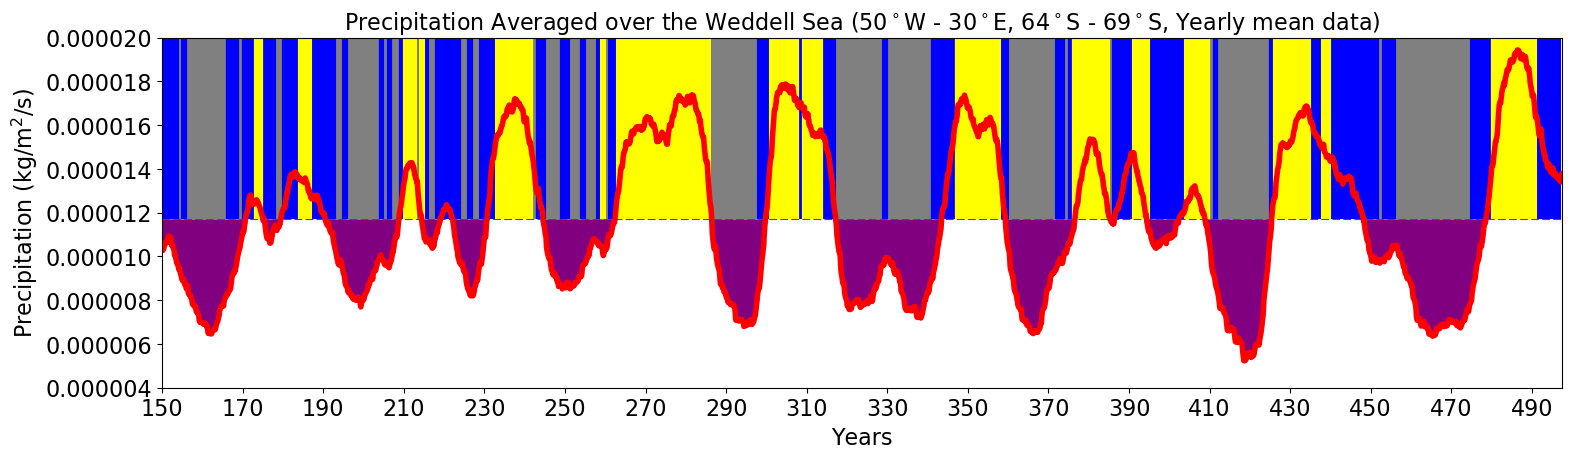

In [31]:
t = np.arange(0,4283,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(ww2,'red',linewidth=4)
ax0.fill_between(t,mean,ww2,where=ww2 < mean,facecolor='purple', alpha=1)
plt.hlines(mean, 0, 4283, colors = "red",linestyles = "dashed")
plt.vlines(noxxx, mean, 0.00002, colors = "grey")
plt.vlines(mrpxxx, mean, 0.00002, colors = "blue")
plt.vlines(xxx, mean, 0.00002, colors = "yellow")
#plt.axhspan(std,0.000005,facecolor='yellow', alpha=1)
#plt.axhspan(-std,std,facecolor='lightblue', alpha=1)
#plt.axhspan(-0.000003,-std,facecolor='lightgreen', alpha=1)
#plt.xticks(range(0,3720,240), ['150','170',\
                            #'190','210','230', '250', '270','290','310','330'],**my_font)
plt.xticks(range(0,4227,240), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
#plt.yticks(np.arange(-0.6,0.6,0.2), ['-0.6', '-0.4', '-0.2', '0','0.2','0.4','0.6'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Precipitation (kg/m$^2$/s)',**my_font)
plt.axis("tight")
ax0.set(ylim=(0.000004, 0.00002),xlim=(0, 4170))
ax0.set_title('Precipitation Averaged over the Weddell Sea (50$^\circ$W - 30$^\circ$E, 64$^\circ$S - 69$^\circ$S, Yearly mean data)',**my_font)
plt.savefig("Precipitation2.png",bbox_inches='tight',dpi=fig.dpi)